In [19]:
import pandas as pd
import time
import pandas.util.testing as tm
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import re
import plotly.graph_objects as go

In [3]:
#opening the data
df = pd.read_csv("Public_Facing_Costumers_Data.csv",encoding='utf-8')
#df.info()
df1 = df[["title","rating","reviewCount","address","plusCode","category","Sub_category","attributes","isClaimed","latitude","longitude","currentStatus"]]

#df1= df
df1

,title,rating,reviewCount,address,plusCode,category,Sub_category,attributes,isClaimed,latitude,longitude,currentStatus
0,Cuddle Pub,4.6,522.0,"Nieuwe Nieuwstraat 20, 1012 NH Amsterdam, Neth...","9VGV+5H Amsterdam, Netherlands",Bar,Bar & grill,· Dine-in · Takeaway · Delivery,True,52.375437,4.893937,Closed Opens at 12:00
1,Labyrinth Cocktail Soul Food & Poetry Bar,4.8,283.0,"Amstelveenseweg 53, 1075 VT Amsterdam, Netherl...","9V34+J8 Amsterdam, Netherlands",Bar,Cocktail bar,· Dine-in,True,52.354062,4.855812,Closed Opens at 17:00
2,Louis Bar,4.4,490.0,"Nieuwebrugsteeg 13, 1012 AG Amsterdam, Netherl...","9VGX+GV Amsterdam, Netherlands",Bar,Bar,· Delivery,True,52.376312,4.899687,Closed Opens at 11:00
3,Temple Bar,4.2,797.0,"Kloveniersburgwal 2, 1012 CT Amsterdam, Nether...","9VCX+VP Amsterdam, Netherlands",Bar,Bar,· Delivery,True,52.372188,4.899312,Closed Opens at 12:00
4,Freddy's Bar,4.6,301.0,"Nieuwe Doelenstraat 2-14, 1012 AC Amsterdam, N...","9V9V+2J Amsterdam, Netherlands",Bar,Bar,NaN,True,52.367562,4.894063,Closed Opens at 12:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1648,Starbucks De Meern,4.0,1507.0,"Meerndijk 59, 3454 HP Utrecht, Netherlands","32CH+Q2 Utrecht, Netherlands",Coffee shop,Coffee shop,Seattle-based coffeehouse chain known for its ...,True,52.071937,5.027563,NaN
1649,Starbucks,4.0,1021.0,"De Andel 1, 2811 NT Reeuwijk, Netherlands","2PQ4+Q3 Reeuwijk, Netherlands",Coffee shop,Coffee shop,Seattle-based coffeehouse chain known for its ...,True,52.039437,4.705188,Open now 6AM–9PM
1650,Dunkin' Donuts,4.1,192.0,"Vredenburg 1, 3511 BA Utrecht, Netherlands","34R8+P5 Utrecht, Netherlands",Restaurant,Donut shop,Long-running chain serving signature breakfast...,True,52.091813,5.115437,Open now 8AM–8PM
1651,coffeecompany,4.2,333.0,"Noordeinde 54, 2514 GK Den Haag, Netherlands","38J5+42 The Hague, Netherlands",Bar,Cafe,· Takeaway · Delivery,False,52.080312,4.307563,Open now 7:30AM–7PM


In [6]:
df.isna().sum()
#check is null 

df1["category"].value_counts()

v  = [re.search(r'(.)(\d\d\d\d)(.)',zipo) for zipo in df1["address"].to_list()]

zips =  []

for e in v:
    if e != None:
        zips.append(e.group(0).strip())
    else:
        zips.append("None")

df1['Zips'] = zips

df1['Zips'].value_counts()

<ipython-input-6-ed551ae85e6b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Zips'] = zips


1012     258
1017     184
None      97
1016      61
1071      53
        ... 
2101       1
94118      1
6041       1
79902      1
17600      1
Name: Zips, Length: 201, dtype: int64

In [7]:
print(df1[df1['Zips'] == "1010"]["category"].value_counts())
print("==================")
print(df1[df1['Zips'] == "1012"]["category"].value_counts())
print("==================")
print(df1[df1['Zips'] == "1015"]["category"].value_counts())
print("==================")
print(df1[df1['Zips'] == "1016"]["category"].value_counts())
print("==================")
print(df1[df1['Zips'] == "1017"]["category"].value_counts())
print("==================")
print(df1[df1['Zips'] == "1018"]["category"].value_counts())

Series([], Name: category, dtype: int64)
Bar             85
Restaurant      46
Hotel           38
Shopping        34
Pub             26
Coffee shop     10
Not-relevant     8
Museum           4
Club             3
Name: category, dtype: int64
Restaurant     13
Bar            10
Pub             6
Hotel           5
Coffee shop     3
Name: category, dtype: int64
Restaurant      20
Bar             16
Hotel           10
Shopping         5
Coffee shop      4
Not-relevant     2
Club             2
Pub              1
Name: category, dtype: int64
Bar             54
Restaurant      50
Pub             20
Hotel           19
Shopping        14
Coffee shop     11
Club            11
Museum           3
Not-relevant     2
Name: category, dtype: int64
Restaurant      10
Hotel            7
Bar              4
Pub              2
Coffee shop      2
Museum           2
Not-relevant     2
Name: category, dtype: int64


              Standard      1012  Investment Oppurtunity
Bar           1.382114  2.236936                0.854822
Club          0.138211  0.078951               -0.059261
Coffee shop   0.560976  0.263169               -0.297807
Hotel         1.000000  1.000042                0.000042
Museum        0.304878  0.105268               -0.199610
Not-relevant  0.313008  0.210535               -0.102473
Park          0.008130       NaN                     NaN
Pub           0.422764  0.684239                0.261475
Restaurant    1.983740  1.210577               -0.773163
Shopping      0.544715  0.894775                0.350059
              Standard      1015  Investment Oppurtunity
Bar           1.382114  2.002002                0.619888
Club          0.138211       NaN                     NaN
Coffee shop   0.560976  0.600601                0.039625
Hotel         1.000000  1.001001                0.001001
Museum        0.304878       NaN                     NaN
Not-relevant  0.313008       Na

<AxesSubplot:>

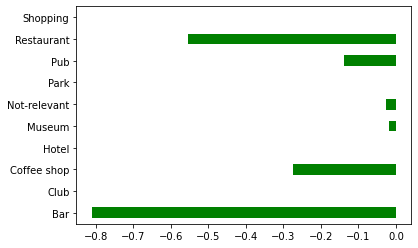

In [47]:
Standard = df1["category"].value_counts() / sum(df1["category"].value_counts()) * 100 / 15.018315

Zone_1 = (df1[df1['Zips'] == "1012"]["category"].value_counts() / sum(df1[df1['Zips'] == "1012"]["category"].value_counts()))*100/14.96

Zone_2 = (df1[df1['Zips'] == "1015"]["category"].value_counts() / sum(df1[df1['Zips'] == "1015"]["category"].value_counts()))*100/13.5

Zone_3 = (df1[df1['Zips'] == "1016"]["category"].value_counts() / sum(df1[df1['Zips'] == "1016"]["category"].value_counts()))*100/16.67

Zone_4 = (df1[df1['Zips'] == "1017"]["category"].value_counts() / sum(df1[df1['Zips'] == "1017"]["category"].value_counts()))*100/10.32

Zone_5 = (df1[df1['Zips'] == "1018"]["category"].value_counts() / sum(df1[df1['Zips'] == "1018"]["category"].value_counts()))*100/24.13



Z1_df = pd.DataFrame({"Standard":Standard,"1012":Zone_1,"Investment Oppurtunity":Zone_1-Standard})
Z2_df = pd.DataFrame({"Standard":Standard,"1015":Zone_2,"Investment Oppurtunity":Zone_2-Standard})
Z3_df = pd.DataFrame({"Standard":Standard,"1016":Zone_3,"Investment Oppurtunity":Zone_3-Standard})
Z4_df = pd.DataFrame({"Standard":Standard,"1017":Zone_4,"Investment Oppurtunity":Zone_4-Standard})
Z5_df = pd.DataFrame({"Standard":Standard,"1018":Zone_5,"Investment Oppurtunity":Zone_5-Standard})

print(Z1_df)
print("==================")
print(Z2_df)
print("==================")
print(Z3_df)
print("==================")
print(Z4_df)
print("==================")
print(Z5_df)

listy = [Z1_df,Z2_df,Z3_df,Z4_df,Z5_df]


Z5_df['positive'] = Z5_df['Investment Oppurtunity'] > 0

Z5_df['Investment Oppurtunity'].plot(kind='barh', color=Z5_df.positive.map({True: 'r', False: 'g'}))


In [36]:
u=df1['category'].dropna().drop_duplicates().tolist()
v=df1['category'].value_counts().tolist()

10

In [37]:
fig = go.Figure(data=[go.Pie(labels=u, values=v)])
fig.show()

In [46]:
size = v
fig = go.Figure(data=[go.Scatter(
    x=u, y=v,
    mode='markers',
    marker=dict(
        color=v,
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(40.**2),
        sizemin=4,
        showscale=True
        )
)])

fig.show()